In [279]:
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [3]:
X_train = np.load(os.path.join(data_folder, 'Xy_train_strat_dist.npz'))["y"]
y_train = np.load(os.path.join(data_folder, 'Xy_train_strat_dist.npz'))["dist"]

In [4]:
X_test = np.load(os.path.join(data_folder, 'Xy_test_strat_dist.npz'))["y"]
y_test = np.load(os.path.join(data_folder, 'Xy_test_strat_dist.npz'))["dist"]

In [5]:
y_train

array([ 4, 25,  4,  2, 25,  2, 10, 10,  2, 25,  2,  4,  2, 25, 25,  2, 25,
        2, 25,  2,  4,  2, 10,  4,  2,  2, 25,  2,  4,  4, 10,  2, 10, 25,
        2,  2, 25, 10, 10,  2,  4,  2,  4,  4,  2,  4, 10,  2,  4, 10, 10,
       25,  2,  4, 25, 25, 25, 25,  4,  4, 25,  4, 10,  4,  4, 10, 25,  4,
        4, 10,  2,  4, 10, 25,  2, 25,  2,  4,  4, 10, 25,  2,  4,  4, 10,
        4, 25, 25,  4,  2, 10, 10, 10, 10,  2, 25,  4, 25,  4, 25, 10, 10,
       10, 10, 10, 25, 25, 25,  4,  4,  2,  2, 10,  2, 25,  2,  2,  2, 10,
        2,  4,  4,  2, 25, 25, 25, 25,  4,  2, 25,  4, 10, 10,  4, 25,  2,
       10,  2, 25,  2,  2, 10, 25,  2,  4, 10,  2, 25,  2, 10, 10,  4, 25,
        4, 10, 25, 25,  2,  2, 10,  2, 25, 25, 10, 10,  2,  2,  4,  4,  2,
       10,  2,  4,  2,  4, 25, 25, 25, 25, 25, 25,  2,  2, 10,  2, 10,  2,
        2, 25,  2, 10,  2,  2, 10,  2,  4, 10, 25,  4, 25,  2, 25, 10, 10,
        2,  4, 25, 10, 25,  2,  2,  4,  2,  4, 10,  4,  4, 10,  4, 25, 10,
       10, 10,  4, 25,  2

In [6]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [7]:
X_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["y"]
y_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["dist"]

X_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["y"]
y_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["dist"]

In [8]:
X_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["y"]
y_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["dist"]

X_20mm = np.load(os.path.join(data_folder, "Xy_20mm.npz"))["y"]
y_20mm = np.load(os.path.join(data_folder, "Xy_20mm.npz"))["dist"]



In [9]:
X_train_cut = cut_X(X_train)
X_train_RF = reshape_RF(X_train_cut)

X_test_cut = cut_X(X_test)
X_test_RF = reshape_RF(X_test_cut)



In [10]:

X_1mm_cut = cut_X(X_1mm)
X_1mm_RF = reshape_RF(X_1mm_cut)

X_3mm_cut = cut_X(X_3mm)
X_3mm_RF = reshape_RF(X_3mm_cut)

X_15mm_cut = cut_X(X_15mm)
X_15mm_RF = reshape_RF(X_15mm_cut)

X_20mm_cut = cut_X(X_20mm)
X_20mm_RF = reshape_RF(X_20mm_cut)


In [11]:
rf = joblib.load(os.path.join(data_dir,"trained_models","Leaf_position_regression","leaf_regression_RF_30est_8depth.pkl"))

In [12]:
preds_15mm = rf.predict(X_15mm_RF)

In [13]:
mean_squared_error(y_15mm, preds_15mm)

0.14568148148148144

In [14]:
preds_1mm = rf.predict(X_1mm_RF)

In [15]:
mean_squared_error(y_1mm, preds_1mm)

1.0

In [16]:
preds_3mm = rf.predict(X_3mm_RF)

In [17]:
mean_squared_error(y_3mm, preds_3mm)

0.49333333333333335

In [18]:
preds_20mm = rf.predict(X_20mm_RF)

In [19]:
mean_squared_error(y_20mm, preds_20mm)

1.1747333333333332

In [20]:
preds_20mm

array([18.5, 18.5, 19. , 21. , 20.5, 20. , 19. , 19.5, 18. , 18.5, 20. ,
       21. , 20. , 21. , 19. , 19. , 20.5, 20. , 19. , 18.3, 20.5, 21.5,
       21.5, 19. , 18. , 18. , 19.5, 20.5, 21. , 18.5, 19. , 19.5, 21.5,
       19. , 20. , 19.5, 22. , 21. , 19.8, 18.5, 21. , 19. , 19.5, 20. ,
       19. , 18.5, 21.5, 20.5, 19.1, 18.5, 22. , 19. , 20. , 19.5, 18.5,
       19.5, 20. , 19.5, 19. , 18.5, 19.5, 20.5, 20.5, 19. , 18.5, 20. ,
       21. , 19. , 21. , 18.5, 19.5, 21. , 21.5, 18.5, 19. , 21.5, 19.5,
       20. , 21. , 18.5, 19.5, 21. , 19. , 18.5, 19. , 20.5, 19. , 18.5,
       21. , 19. , 18.5, 20.6, 20.5, 19.3, 19. , 20. , 19.5, 19. , 19.5,
       19. , 19.5, 20. , 20.6, 18. , 19. , 19.5, 20. , 19. , 18.5, 19.5,
       20. , 19.5, 19.5, 21. , 20. , 18. , 21.5, 20. , 18.5, 17.5, 19.5,
       20. , 20.5, 20. , 20. , 19. , 19. , 21. , 20. , 19. , 21.5, 20. ,
       19.5, 21.5, 18.5, 18.5, 22. , 22. , 19. , 19. , 19.5, 21. , 19. ,
       18.8, 19.3, 19.5, 21.5, 19.5, 21.5, 19. , 18

In [32]:
preds_20_round = np.round(preds_20mm - 0.05)

In [33]:
mean_squared_error(y_20mm, preds_20_round)

1.51

In [34]:
preds_20_round

array([18., 18., 19., 21., 20., 20., 19., 19., 18., 18., 20., 21., 20.,
       21., 19., 19., 20., 20., 19., 18., 20., 21., 21., 19., 18., 18.,
       19., 20., 21., 18., 19., 19., 21., 19., 20., 19., 22., 21., 20.,
       18., 21., 19., 19., 20., 19., 18., 21., 20., 19., 18., 22., 19.,
       20., 19., 18., 19., 20., 19., 19., 18., 19., 20., 20., 19., 18.,
       20., 21., 19., 21., 18., 19., 21., 21., 18., 19., 21., 19., 20.,
       21., 18., 19., 21., 19., 18., 19., 20., 19., 18., 21., 19., 18.,
       21., 20., 19., 19., 20., 19., 19., 19., 19., 19., 20., 21., 18.,
       19., 19., 20., 19., 18., 19., 20., 19., 19., 21., 20., 18., 21.,
       20., 18., 17., 19., 20., 20., 20., 20., 19., 19., 21., 20., 19.,
       21., 20., 19., 21., 18., 18., 22., 22., 19., 19., 19., 21., 19.,
       19., 19., 19., 21., 19., 21., 19., 18., 21., 21., 19., 18., 18.,
       22., 19., 18., 18., 20., 22., 21., 20., 19., 20., 20., 20., 19.,
       18., 19., 20., 20., 18., 20., 21., 20., 20., 18., 19., 20

In [35]:
y_20mm

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20

In [37]:
mean_absolute_error(y_20mm, preds_20_round)

1.01

In [38]:
preds_20_round

array([18., 18., 19., 21., 20., 20., 19., 19., 18., 18., 20., 21., 20.,
       21., 19., 19., 20., 20., 19., 18., 20., 21., 21., 19., 18., 18.,
       19., 20., 21., 18., 19., 19., 21., 19., 20., 19., 22., 21., 20.,
       18., 21., 19., 19., 20., 19., 18., 21., 20., 19., 18., 22., 19.,
       20., 19., 18., 19., 20., 19., 19., 18., 19., 20., 20., 19., 18.,
       20., 21., 19., 21., 18., 19., 21., 21., 18., 19., 21., 19., 20.,
       21., 18., 19., 21., 19., 18., 19., 20., 19., 18., 21., 19., 18.,
       21., 20., 19., 19., 20., 19., 19., 19., 19., 19., 20., 21., 18.,
       19., 19., 20., 19., 18., 19., 20., 19., 19., 21., 20., 18., 21.,
       20., 18., 17., 19., 20., 20., 20., 20., 19., 19., 21., 20., 19.,
       21., 20., 19., 21., 18., 18., 22., 22., 19., 19., 19., 21., 19.,
       19., 19., 19., 21., 19., 21., 19., 18., 21., 21., 19., 18., 18.,
       22., 19., 18., 18., 20., 22., 21., 20., 19., 20., 20., 20., 19.,
       18., 19., 20., 20., 18., 20., 21., 20., 20., 18., 19., 20

In [22]:
test_preds = rf.predict(X_test_RF)

In [23]:
mean_squared_error(y_test, test_preds)

0.03043055555555555

In [288]:
preds_15_unet=rf.predict(X_15mm_UNet_RF)-1

In [291]:
np.savez_compressed("out_data_paper.npz", gt_y = y_test, gt_preds =test_preds,
                    unet_y = y_test_pred_unet, unet_preds=preds_unet, 
                   unet_y_15=y_15mm_UNet, unet_preds_15=preds_15_unet,
                   gt_y_15=y_15mm, gt_preds_15=preds_15mm)

In [280]:
r2_score(y_test, test_preds)

0.9996251817637499

In [24]:
test_preds

array([10.        , 25.        ,  4.        ,  2.        ,  4.        ,
       10.        ,  2.        ,  2.        , 10.        , 25.        ,
        2.        ,  4.        ,  2.        ,  2.        , 25.        ,
       25.        , 25.        , 25.        , 10.        ,  9.8       ,
        4.        ,  4.        ,  3.93333333, 25.        , 25.        ,
        4.        ,  2.        ,  9.2       , 10.        , 25.        ,
        9.4       , 10.        , 10.        , 10.        ,  4.        ,
       10.        , 10.        , 10.        ,  2.        , 25.        ,
        2.        ,  4.        ,  4.        , 25.        ,  4.        ,
        4.        ,  4.        , 10.        ,  4.        ,  4.        ,
        2.        ,  2.        ,  4.        , 10.        ,  2.        ,
       25.        , 25.        ,  2.        , 10.        , 10.        ,
        2.        , 25.        ,  4.        ,  4.        ,  4.        ,
        4.        ,  4.        , 10.        ,  2.        , 25.  

In [25]:
X_test_pred_unet = np.load(os.path.join(data_dir,"trained_models","UNet_training_generator_1500epochs", "Xy_test_predicted_UNet.npz"))[ "y"]
y_test_pred_unet = np.load(os.path.join(data_dir,"trained_models", "UNet_training_generator_1500epochs", "Xy_test_predicted_UNet.npz"))[ "dist"]

In [26]:
X_test_unet_cut = cut_X(X_test_pred_unet)
X_test_unet_RF = reshape_RF(X_test_unet_cut)

In [27]:
rf.predict(X_test_unet_RF)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [28]:
y_test_pred_unet

array([25, 10,  2,  4,  2, 25,  4, 25,  4, 10, 10,  2,  2, 10,  2,  2,  4,
       10, 10,  4,  4, 10, 10,  4,  2,  2, 10,  4,  4,  4,  4, 10, 10, 10,
        4,  4,  4,  2,  4, 10, 25,  2, 25,  4, 25,  4,  4,  2,  2,  2, 10,
       25,  4,  2, 25,  4, 25, 25, 25,  4,  4,  2,  2,  2,  2, 25,  2,  4,
        4,  4,  4,  2, 25,  2,  2,  4,  2,  2, 25, 10, 25,  2, 10,  2,  4,
       25, 25,  2, 25, 10,  4,  4,  2,  4, 25, 10,  4, 25,  2,  2,  4,  2,
       10,  2, 10, 10, 25, 25, 25, 25,  4, 10,  2, 25, 10, 25,  2,  2, 10,
        2,  4, 25, 25, 25,  4, 25,  4,  2, 10, 10,  2, 25,  4,  2, 25, 10,
       10,  4,  4, 25, 25, 10,  4, 10, 10,  4, 10, 10,  4,  4, 25,  4, 10,
        2, 25,  4,  4,  2, 25,  4, 25, 25, 25,  2,  2, 10,  2, 10, 10,  2,
       10, 25,  4,  2,  2,  4,  2, 25,  2, 10, 10, 10,  2, 25,  2, 25,  4,
       10,  4,  4, 10, 10,  2, 10,  4,  2,  2, 25, 25,  2, 10, 25, 10, 25,
       10,  2, 10, 10, 10, 25, 25, 10,  4, 10, 25,  2, 10,  2, 10,  4, 25,
       25, 25, 25,  2,  4

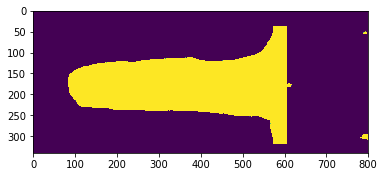

In [29]:
plt.imshow(X_test_unet_cut[0])

In [30]:
X_test_unet_cut.shape

(240, 340, 800)

In [31]:
X_test_cut.shape

(240, 340, 800, 1)

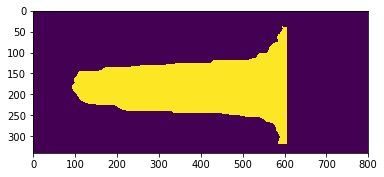

In [32]:
plt.imshow(X_test_cut[1][...,0])

In [33]:
rf.predict([X_test_unet_RF[1].astype(np.uint8)])

array([2.])

In [34]:
y_test

array([10, 25,  4,  2,  4, 10,  2,  2, 10, 25,  2,  4,  2,  2, 25, 25, 25,
       25, 10, 10,  4,  4,  4, 25, 25,  4,  2, 10, 10, 25, 10, 10, 10, 10,
        4, 10, 10, 10,  2, 25,  2,  4,  4, 25,  4,  4,  4, 10,  4,  4,  2,
        2,  4, 10,  2, 25, 25,  2, 10, 10,  2, 25,  4,  4,  4,  4,  4, 10,
        2, 25, 10,  2,  4,  4,  2, 25, 10,  4,  2,  2, 25, 25,  2,  2,  4,
       10, 10,  2,  2, 10,  4,  4,  2, 25,  4,  4,  4,  2,  2,  2,  4,  2,
       10,  2,  2, 25,  2,  4,  2,  2, 10, 10, 10,  4, 25,  2,  4,  2, 10,
        4, 10,  2, 25,  4, 25, 25, 25, 10, 25,  2, 10,  2,  4,  4, 25, 25,
        4,  2, 10, 10, 25, 10,  4,  4, 10, 10, 10, 25,  4,  4, 10,  2,  4,
       25, 25,  2, 25,  2, 10,  2, 10, 25,  2,  4,  4, 10, 10,  4,  4,  4,
       10,  2,  4,  2, 10, 10,  2, 10, 25,  2,  2, 25, 10, 25, 25, 25,  4,
       25,  4, 25,  4, 25,  2,  4, 25,  2,  4, 25, 25, 25,  2, 25, 10,  2,
       10,  4, 10,  2, 10,  2, 25, 10,  4, 25,  2, 25, 25, 25, 25,  4, 10,
       10, 10, 10, 25,  4

In [74]:
X_test_cut[1][...,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
X_test_cut[1][...,0][X_test_cut[1][...,0]!=0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [36]:
X_test_unet_cut[0][X_test_unet_cut[0]!=0]

array([2.6934828e-34, 4.4616344e-35, 1.4082635e-38, ..., 2.8038732e-23,
       2.0302219e-30, 4.3684898e-25], dtype=float32)

In [37]:
X_test_unet_cut_uint8 = X_test_unet_cut.astype(np.uint8)

In [38]:
X_test_unet_cut_uint8[0] = X_test_unet_cut_uint8[0]*255

In [39]:
rf.predict([X_test_unet_cut_uint8[0].ravel()])

array([25.])

In [40]:
X_test_unet_cut = X_test_unet_cut.astype(np.uint8)*255

In [41]:
X_test_unet_RF = reshape_RF(X_test_unet_cut)

In [42]:
preds_unet = rf.predict(X_test_unet_RF)

In [43]:
preds_unet

array([25.        , 10.        ,  2.        ,  4.2       ,  2.        ,
       25.        ,  4.4       , 25.        ,  4.2       , 10.        ,
       10.5       ,  2.        ,  2.        , 10.        ,  2.        ,
        2.        ,  4.        , 10.        , 10.        ,  4.4       ,
        4.6       , 10.5       , 10.5       ,  4.4       ,  2.        ,
        2.        , 10.5       ,  4.        ,  4.        ,  4.4       ,
        4.        , 10.5       , 10.        , 10.5       ,  4.        ,
        4.        ,  4.        ,  2.        ,  4.6       , 10.        ,
       25.        ,  2.        , 25.        ,  4.8       , 25.        ,
        4.        ,  4.        ,  2.        ,  2.        ,  2.        ,
       10.        , 25.        ,  4.        ,  2.        , 25.        ,
        4.        , 25.        , 25.        , 25.        ,  4.        ,
        4.        ,  2.        ,  2.        ,  2.        ,  2.        ,
       25.        ,  2.        ,  4.        ,  4.4       ,  4.  

In [44]:
mean_squared_error(preds_unet, y_test_pred_unet)

0.04672685185185186

In [281]:
r2_score(preds_unet, y_test_pred_unet)

0.9994119243503138

In [46]:
idx_2 = np.where(y_test_pred_unet==2)
idx_4 = np.where(y_test_pred_unet==4)
idx_10 = np.where(y_test_pred_unet==10)
idx_25 = np.where(y_test_pred_unet==25)

In [47]:
mean_squared_error(preds_unet[idx_2], y_test_pred_unet[idx_2])

0.002007168458781365

In [48]:
mean_squared_error(preds_unet[idx_4], y_test_pred_unet[idx_4])

0.06400000000000004

In [49]:
mean_squared_error(preds_unet[idx_10], y_test_pred_unet[idx_10])

0.12083333333333333

In [50]:
mean_squared_error(preds_unet[idx_25], y_test_pred_unet[idx_25])

0.0

In [254]:
import numpy as np
from scipy.stats import norm

def plot_histo(preds, true, xmin, xmax, nbins_fit, nbins_hist=8):
    data = preds-true
    mean,std=norm.fit(data)

    plt.hist(data, bins=nbins_hist, density=True, facecolor='white',edgecolor ="k",  alpha=1, label="data")
    #xmin, xmax = plt.xlim()
    x = np.linspace(xmin,xmax, nbins_fit)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, c='r', linestyle='-.', label='gaussian fit')
    plt.xlabel('(predicted-true) leaf position [mm]')
    plt.ylabel('Frequence')
    plt.title(r'$\mathrm{Resolution\ histogram:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
    plt.legend(loc='upper right')
    return





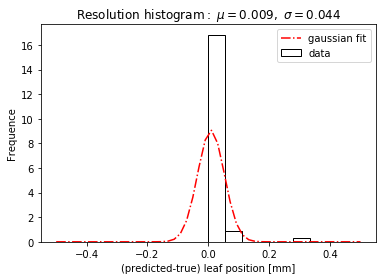

In [224]:
plot_histo(preds_unet[idx_2], y_test_pred_unet[idx_2], -0.5,0.5, nbins_fit=50, nbins_hist=6)

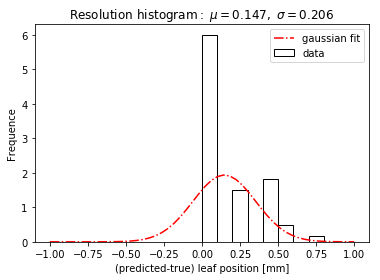

In [262]:
plot_histo(preds_unet[idx_4], y_test_pred_unet[idx_4], -1.0,1.0, nbins_fit=50, nbins_hist=8)

plt.savefig("resolution_histo_4mm_data_UNet.png")

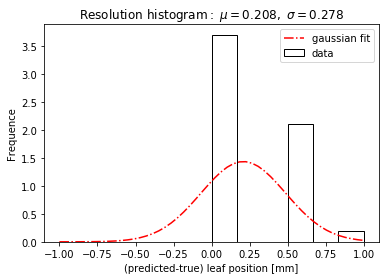

In [226]:
plot_histo(preds_unet[idx_10], y_test_pred_unet[idx_10], -1.0,1.0, nbins_fit=50, nbins_hist=6)

/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


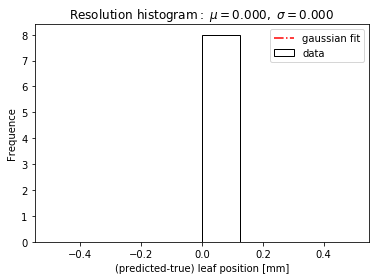

In [227]:
plot_histo(preds_unet[idx_25], y_test_pred_unet[idx_25], -1.0,1.0, 10)

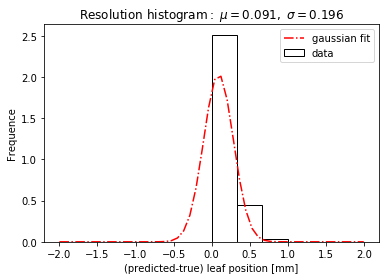

In [272]:
plot_histo(preds_unet, y_test_pred_unet, -2.0,2.0, nbins_fit=50, nbins_hist=3)

plt.savefig("resolution_histo_UNet.png")

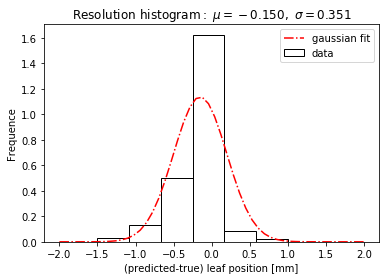

In [256]:
plot_histo(preds_15mm, y_15mm, -2.0,2.0, nbins_fit=50, nbins_hist=6)

plt.savefig("resolution_histo_15mm_data_gt.png")

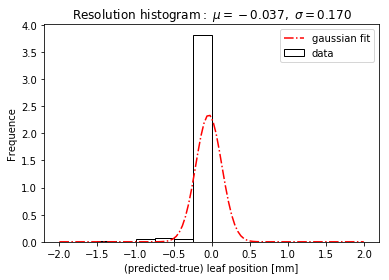

In [257]:
plot_histo(test_preds, y_test, -2.0,2.0, nbins_fit=100, nbins_hist=6)

plt.savefig("resolution_histo_gt.png")

In [123]:
def plot_histo2(preds, true, xmin, xmax, nbins):
    data = preds-true
    mean,std=norm.fit(data)

    plt.hist2d(true,preds,  alpha=1)
    #xmin, xmax = plt.xlim()
    #x = np.linspace(xmin,xmax, nbins)
    #y = norm.pdf(x, mean, std)
    #plt.plot(x, y, c='r')
    plt.xlabel('y_pred-y_true(mm)')
    plt.ylabel('Frequence')
    plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
    plt.show()
    return




In [128]:
mse_unet = [mean_squared_error(preds_unet[idx], y_test_pred_unet[idx]) for idx in [idx_2, idx_4, idx_10, idx_25]]

(-0.01, 0.5)

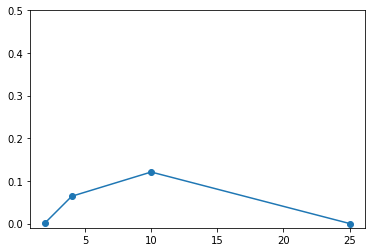

In [149]:
plt.plot([2,4,10,25], mse_unet,  marker='o')
plt.ylim(-0.010,0.5)

In [130]:
mse_gt = [mean_squared_error(test_preds[idx], y_test[idx]) for idx in [idx_2, idx_4, idx_10, idx_25]]

(0, 0.5)

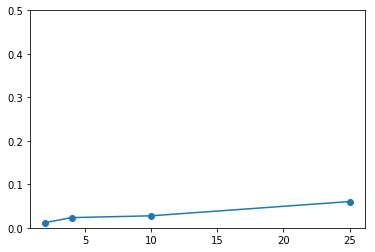

In [148]:
plt.plot([2,4,10,25], mse_gt, marker='o')
plt.ylim(0,0.5)

In [242]:
X_15mm_UNet = np.load(os.path.join(data_dir, "trained_models/UNet_training_generator_1500epochs/Xy_15mm_clean_predicted_UNet.npz"))["y"]
y_15mm_UNet = np.load(os.path.join(data_dir, "trained_models/UNet_training_generator_1500epochs/Xy_15mm_clean_predicted_UNet.npz"))["dist"]



In [243]:
X_15mm_UNet_cut = cut_X(X_15mm_UNet)
X_15mm_UNet_RF = reshape_RF(X_15mm_UNet_cut)



In [244]:
mean_squared_error(rf.predict(X_15mm_UNet_RF), y_15mm_UNet)

1.7933333333333332

In [245]:
rf.predict(X_15mm_UNet_RF)

array([15. , 15.5, 15.5, 16. , 16. , 16.5, 16. , 16.5, 15.5, 17. , 16.5,
       17. , 17. , 15.5, 15.5, 16.5, 15. , 15.5, 16. , 17. , 15.5, 15.5,
       16. , 16. , 16.5, 17. , 15.5, 15. , 16.5, 16.5, 16.5, 16.5, 15. ,
       16. , 15.5, 15.5, 16. , 15. , 16. , 17. , 16.5, 16.5, 16. , 15.5,
       17. , 17. , 16. , 16.5, 16. , 17. , 16.5, 17. , 16.5, 16. , 17. ,
       15.5, 16. , 15. , 16. , 16. , 17. , 15.5, 16. , 16. , 16.5, 16. ,
       16. , 15.5, 17. , 17. , 16.5, 16.5, 15. , 15. , 16.5, 16. , 17. ,
       16. , 15.5, 15.5, 16. , 17. , 16. , 16. , 17. , 16.5, 17. , 17. ,
       16.5, 16. , 16.5, 17. , 17. , 16. , 16.5, 16.5, 15.5, 15.5, 16.5,
       15.5, 15.5, 16. , 15. , 16. , 15.5, 16.5, 16.5, 16. , 15.5, 17. ,
       16. , 16.5, 15.5, 17. , 16. , 16.5, 17. , 16. , 15. , 16.5, 17. ,
       15.5, 15. , 16. , 17. , 16.5, 17. , 16. , 16. , 16.5, 16. , 16. ,
       16.5, 16.5, 16.5, 17. , 16. , 16.5, 15. , 16.5, 16. , 16. , 17. ,
       16. , 16. , 17. , 15. , 17. , 16. , 17. , 17

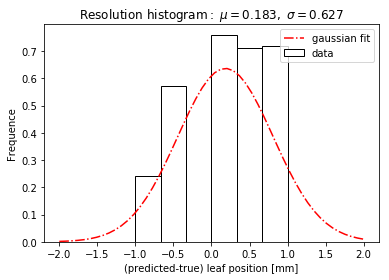

In [266]:
plot_histo(rf.predict(X_15mm_UNet_RF)-1, y_15mm_UNet, -2.0,2.0, nbins_fit=50, nbins_hist=6)
plt.savefig("resolution_histo_15mm_UNet.png")

In [275]:
np.std(rf.predict(X_15mm_UNet_RF)-1)

0.626941429126801

In [292]:
mean_squared_error(rf.predict(X_15mm_UNet_RF)-1,y_15mm_UNet)

0.4266666666666667

In [278]:
np.mean(rf.predict(X_15mm_UNet_RF)-1 - y_15mm_UNet)

0.18333333333333332

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 300
    # variables        = 3
    chi-square         = 67500.0000
    reduced chi-square = 227.272727
    Akaike info crit   = 1630.83012
    Bayesian info crit = 1641.94147
##  Warning: uncertainties could not be estimated:
    amp:  at initial value
    cen:  at initial value
    wid:  at initial value
[[Variables]]
    amp:  5.00000000 (init = 5)
    cen:  5.00000000 (init = 5)
    wid:  1.00000000 (init = 1)



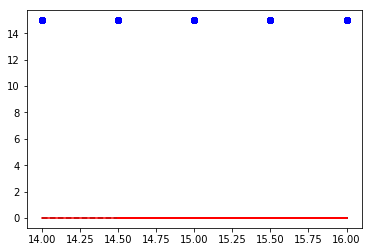

In [285]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

x = rf.predict(X_15mm_UNet_RF)-1
y = y_15mm_UNet


def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

In [287]:
import numpy as np
from ROOT import TCanvas, TGraph

#Some data
x = np.arange(10)
y = x**2

#Canvas to plot on and graph
c = TCanvas()
g = TGraph(x.size, x.astype(np.double),y.astype(np.double))

#Draw canvas and graph
c.Draw()
g.Draw()

ModuleNotFoundError: No module named 'ROOT'